In [1]:
import sishya_lib as sl

In [2]:
import matplotlib.pyplot as plt

def plot_dist_matrix(D, title):
    
    # Create a heatmap
    plt.imshow(D, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

def plot_wp(warping_path, title):
    # Extract x and y coordinates from warping path
    x_seq = [a for a, _ in warping_path]
    y_seq = [b for _, b in warping_path]
    
    # Plot the path
    plt.plot(x_seq, y_seq, 'b-', alpha=0.7)  # Blue line with transparency
    
    # Optional: Customize plot
    plt.xlabel("Sequence 1 Index")
    plt.ylabel("Sequence 2 Index")
    plt.title(title)
    
    plt.show()

pair39_outlier folder has the first 8 segments of vs11 and vs12 and the corresponding labels.
USING EXACT algorithm. NO BAND.

In [3]:
dir = r"C:\Users\Lenovo\Desktop\sishya\audio alignment vs\audio_alignment - nama\dataset - after final tune\pair39_outlier"

aud1 = r"%s\vs11_m.mp3" %(dir)
aud2 = r"%s\vs12_m.mp3" %(dir)

lab1 = r"%s\vs11_m.json" %(dir)
lab2 = r"%s\vs12_m.json" %(dir)


In [4]:
g_aeneas = sl.AlignmentAeneas(algorithm=sl.AlignmentAlgorithm.DTW_EXACT)

In [5]:
g_librosa = sl.AlignmentLibrosa(algorithm=sl.AlignmentAlgorithm.DTW_EXACT)

Load the audios and labels. at is for audio text object. Then calculate the mfcc's for the audio.
We will have two sets of mfcc's, one with librosa code and another with aeneas code.

In [6]:
at1_aeneas = g_aeneas.audio_text(aud1, lab1)
at1_aeneas.load_audio()

at2_aeneas = g_aeneas.audio_text(aud2, lab2)
at2_aeneas.load_audio()


In [7]:
at1_librosa = g_librosa.audio_text(aud1, lab1)
at1_librosa.load_audio()

at2_librosa = g_librosa.audio_text(aud2, lab2)
at2_librosa.load_audio()


In [8]:
at1_aeneas.calc_mfcc(g_aeneas)
at2_aeneas.calc_mfcc(g_aeneas)

at1_librosa.calc_mfcc(g_librosa)
at2_librosa.calc_mfcc(g_librosa)

Pure aeneas and librosa comparison.
MFCC's of librosa and aeneas, cost matrices of librosa and aeneas

In [9]:
ap_aeneas = g_aeneas.alignment_pair(at2_aeneas, at1_aeneas)
ap_librosa = g_librosa.alignment_pair(at2_librosa, at1_librosa)

ap_aeneas.get_warping_path()
ap_librosa.get_warping_path()

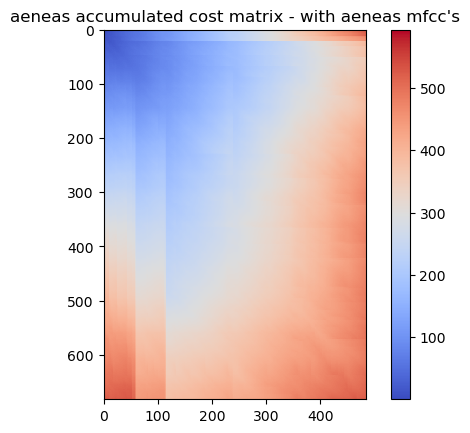

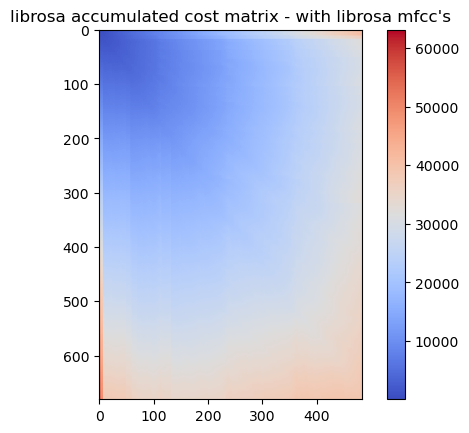

In [10]:
plot_dist_matrix(ap_aeneas.acc_cost_matrix, "aeneas accumulated cost matrix - with aeneas mfcc's")
plot_dist_matrix(ap_librosa.acc_cost_matrix, "librosa accumulated cost matrix - with librosa mfcc's")

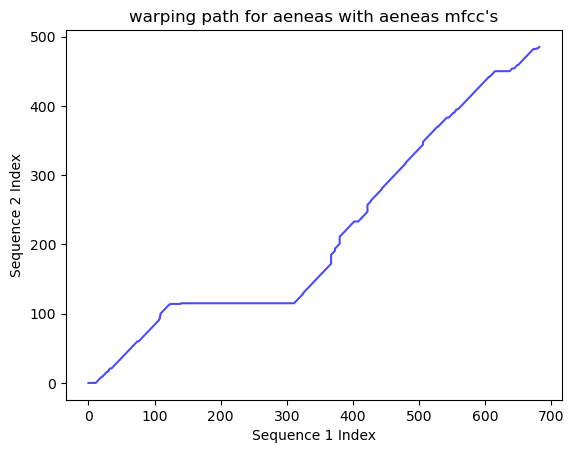

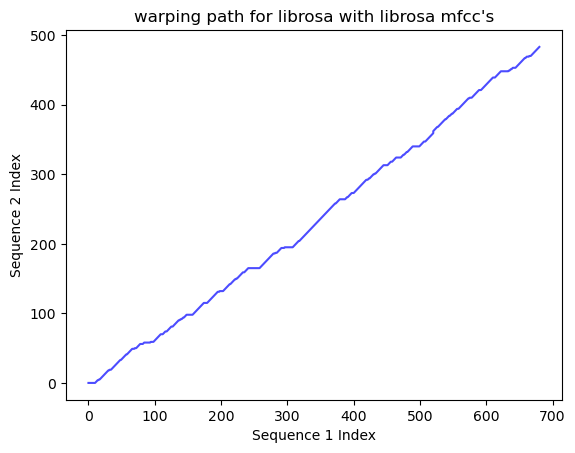

In [11]:
plot_wp(ap_aeneas.wp, "warping path for aeneas with aeneas mfcc's")
plot_wp(ap_librosa.wp, "warping path for librosa with librosa mfcc's")

In [12]:
ap_aeneas = g_aeneas.alignment_pair(at2_librosa, at1_librosa)

ap_aeneas.get_warping_path()


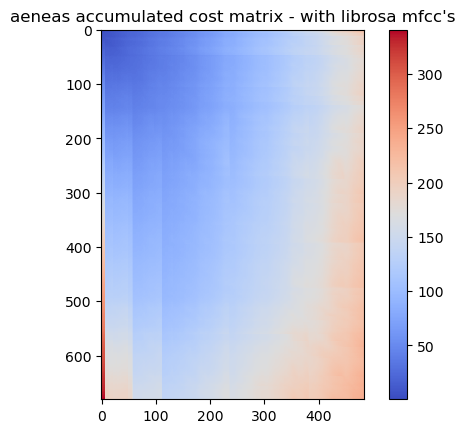

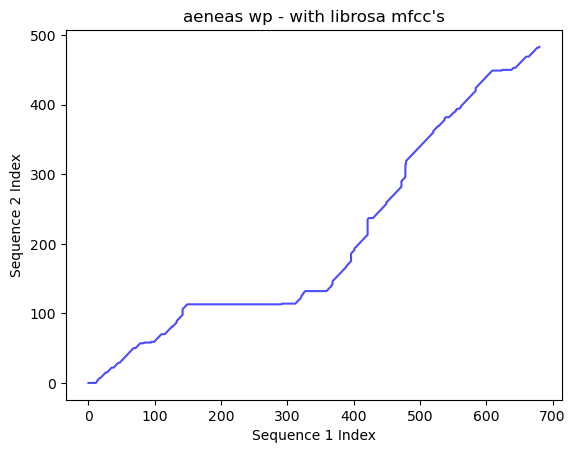

In [13]:
plot_dist_matrix(ap_aeneas.acc_cost_matrix, "aeneas accumulated cost matrix - with librosa mfcc's")
plot_wp(ap_aeneas.wp, "aeneas wp - with librosa mfcc's")

In [14]:
ap_librosa = g_librosa.alignment_pair(at2_aeneas, at1_aeneas)
ap_librosa.get_warping_path()

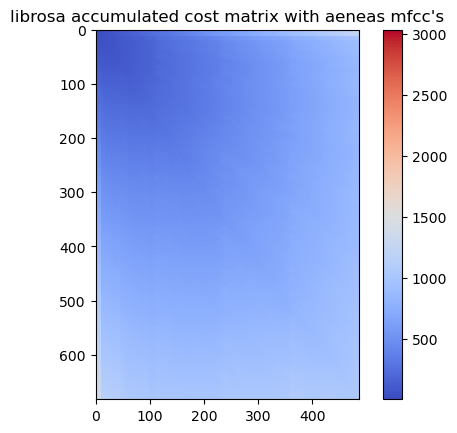

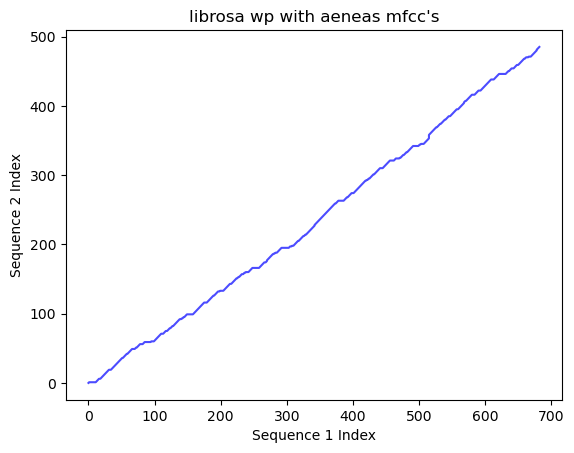

In [15]:
plot_dist_matrix(ap_librosa.acc_cost_matrix, "librosa accumulated cost matrix with aeneas mfcc's")
plot_wp(ap_librosa.wp, "librosa wp with aeneas mfcc's")

In [16]:
ap_librosa = g_librosa.alignment_pair(at2_librosa, at1_librosa)
ap_librosa.get_warping_path()

In [17]:
ap_aeneas.set_acc_cost_matrix(ap_librosa.acc_cost_matrix)
ap_aeneas.get_warping_path()

assert ap_aeneas.acc_cost_matrix.all() == ap_librosa.acc_cost_matrix.all()

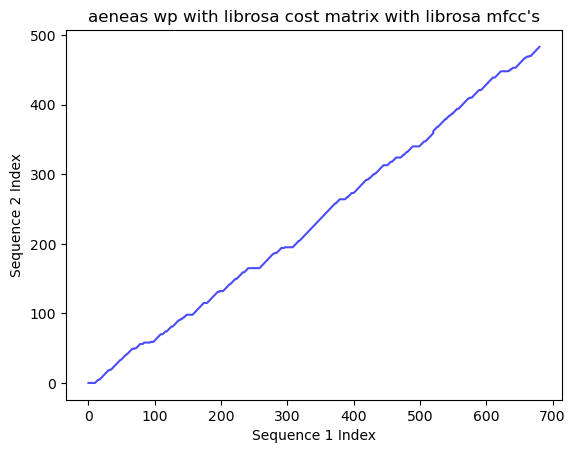

In [18]:
plot_wp(ap_librosa.wp, "aeneas wp with librosa cost matrix with librosa mfcc's")

In [19]:

ap_librosa = g_librosa.alignment_pair(at2_aeneas, at1_aeneas)

ap_librosa.get_warping_path()

ap_aeneas.set_acc_cost_matrix(ap_librosa.acc_cost_matrix)
ap_aeneas.get_warping_path()

assert ap_aeneas.acc_cost_matrix.all() == ap_librosa.acc_cost_matrix.all()

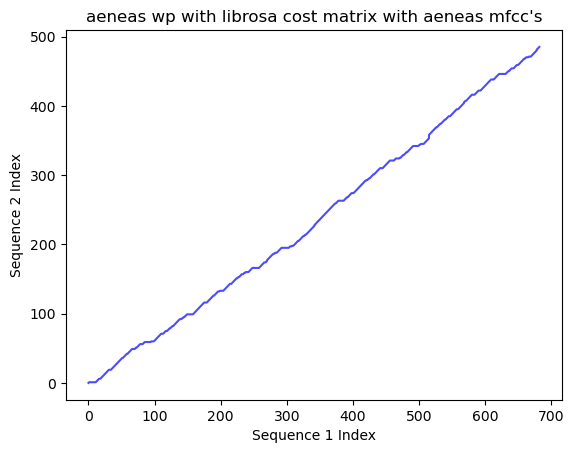

In [20]:
plot_wp(ap_librosa.wp, "aeneas wp with librosa cost matrix with aeneas mfcc's")

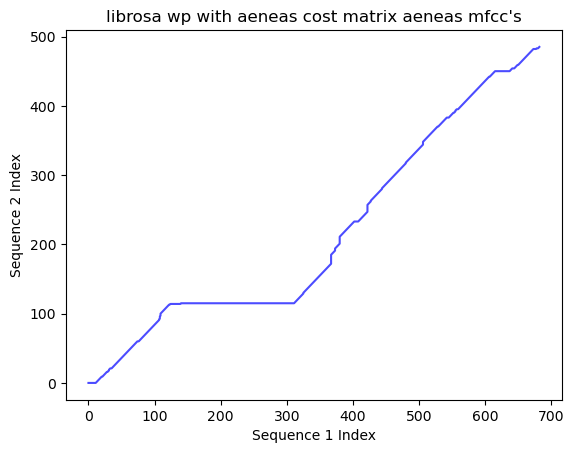

In [24]:
import librosa
ap_aeneas = g_aeneas.alignment_pair(at2_aeneas, at1_aeneas)
cost_matrix = ap_aeneas.get_cost_matrix()
D, wp = librosa.sequence.dtw(C = cost_matrix, subseq=False)
plot_wp(wp, "librosa wp with aeneas cost matrix aeneas mfcc's")

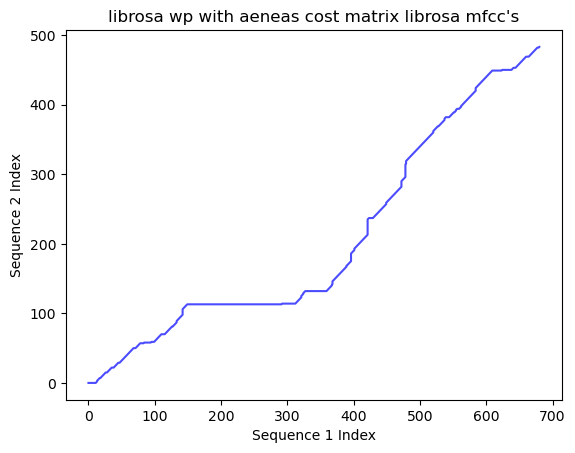

In [25]:
ap_aeneas = g_aeneas.alignment_pair(at2_librosa, at1_librosa)
cost_matrix = ap_aeneas.get_cost_matrix()
D, wp = librosa.sequence.dtw(C = cost_matrix, subseq=False)
plot_wp(wp, "librosa wp with aeneas cost matrix librosa mfcc's")